In [3]:
import sys
sys.path.append("/Users/golrokh/Desktop/habitlab_data_analysis/EloPy")
from elopy import *

In [4]:
import json

In [5]:
votecount_desc = []
with open('data/votes.json') as file:
    votecount_desc = json.load(file)

print (votecount_desc)
    

[{'_id': '5b36288b1c40526899667c9f', 'goal': 'facebook/spend_less_time', 'idea': 'Remove the unread notifications icon', 'vote': 117, 'lostvote': 113, 'tie': 43}, {'_id': '5b36288b1c40526899667ca0', 'goal': 'facebook/spend_less_time', 'idea': 'Type out your goals for visiting Facebook', 'vote': 126, 'lostvote': 111, 'tie': 36}, {'_id': '5b36288b1c40526899667ca1', 'goal': 'facebook/spend_less_time', 'idea': 'Injects timer into the Facebook feed', 'vote': 103, 'lostvote': 97, 'tie': 20}, {'_id': '5b36288b1c40526899667ca2', 'goal': 'facebook/spend_less_time', 'idea': 'Removes the Facebook news feed', 'vote': 123, 'lostvote': 126, 'tie': 34}, {'_id': '5b36288b1c40526899667ca3', 'goal': 'facebook/spend_less_time', 'idea': 'Notifies you of time spent in the corner of your desktop', 'vote': 110, 'lostvote': 101, 'tie': 17}, {'_id': '5b36288b1c40526899667ca4', 'goal': 'facebook/spend_less_time', 'idea': 'Removes Facebook comments', 'vote': 88, 'lostvote': 124, 'tie': 30}, {'_id': '5b36288b1c40

In [6]:
votelog_desc = []
with open('data/votelogs_aug8.json') as file:
    votelog_desc = json.load(file)

print(votelog_desc)

[{'_id': '5b3bc09bff5ef9001419db86', 'type': 'vote', 'winnerid': '5b36288b1c40526899667ca8', 'loserid': '5b36288b1c40526899667cad', 'winner': 'Freezes scrolling after a certain amount of scrolls', 'loser': 'Asks what you aim to do this visit and puts a reminder up', 'userid': '88e941f4f44fea817acd8c86', 'installid': '593e006f2df33f59f8e2a2ec', 'timestamp': 1530642587462, 'ip': '171.67.76.131'}, {'_id': '5b3cb672ff5ef9001419db87', 'type': 'vote', 'winnerid': '5b36288b1c40526899667cad', 'loserid': '5b36288b1c40526899667ca5', 'winner': 'Asks what you aim to do this visit and puts a reminder up', 'loser': 'Removes clickbait', 'userid': '8e254d9c0b786ea744a28254', 'installid': 'df8e8263826b4c5f73420bda', 'timestamp': 1530705522584, 'ip': '108.58.51.106'}, {'_id': '5b3cd06aff5ef9001419db88', 'type': 'vote', 'winnerid': '5b36288b1c40526899667ca5', 'loserid': '5b36288b1c40526899667caa', 'winner': 'Removes clickbait', 'loser': 'Makes you wait a few seconds before visiting', 'userid': '458e67bc1

In [7]:
interventions = []
with open('data/interventions.json') as file:
    interventions = json.load(file)
print(interventions)

{'amazon/block_after_interval_per_visit': {'description': 'Asks how long you want to spend on site this visit', 'displayname': 'Bouncer', 'difficulty': 'hard', 'content_scripts': [{'path': '/interventions/generic/block_after_interval_per_visit/frontend.js', 'run_at': 'document_start', 'all_frames': False}], 'parameters': [{'name': 'cheatseconds', 'description': 'Seconds to cheat for after time is up', 'default': 30, 'type': 'int'}, {'name': 'debug', 'description': 'Insert debug console', 'type': 'bool', 'default': False}], 'categories': ['interstitial'], 'generic_intervention': 'generic/block_after_interval_per_visit', 'matches': ['www.amazon.com'], 'goals': ['amazon/spend_less_time'], 'name': 'amazon/block_after_interval_per_visit', 'sitename': 'amazon', 'sitename_printable': 'Amazon', 'is_default': False, 'nomatches': [], 'background_scripts': [], 'conflicts': ['amazon/make_user_wait', 'amazon/prompt_reason', 'amazon/show_user_info_interstitial', 'buzzfeed/block_after_interval_per_vi

In [8]:
def find_intervention(description):
    for x in interventions.keys():
        if interventions[x]['description'] == description:
            return x
    return '404'

In [9]:
votecount = {}
for i in votecount_desc:
    intervention = find_intervention(i['idea'])
    if intervention == '404':
        continue
    votecount[intervention] = i

print (votecount)

{'facebook/feed_injection_timer': {'_id': '5b36288b1c40526899667ca1', 'goal': 'facebook/spend_less_time', 'idea': 'Injects timer into the Facebook feed', 'vote': 103, 'lostvote': 97, 'tie': 20}, 'facebook/remove_news_feed': {'_id': '5b36288b1c40526899667ca2', 'goal': 'facebook/spend_less_time', 'idea': 'Removes the Facebook news feed', 'vote': 123, 'lostvote': 126, 'tie': 34}, 'facebook/rich_notifications': {'_id': '5b36288b1c40526899667ca3', 'goal': 'facebook/spend_less_time', 'idea': 'Notifies you of time spent in the corner of your desktop', 'vote': 110, 'lostvote': 101, 'tie': 17}, 'facebook/remove_comments': {'_id': '5b36288b1c40526899667ca4', 'goal': 'facebook/spend_less_time', 'idea': 'Removes Facebook comments', 'vote': 88, 'lostvote': 124, 'tie': 30}, 'facebook/remove_clickbait': {'_id': '5b36288b1c40526899667ca5', 'goal': 'facebook/spend_less_time', 'idea': 'Removes clickbait', 'vote': 110, 'lostvote': 110, 'tie': 31}, 'amazon/toast_notifications': {'_id': '5b36288b1c40526899

In [10]:
from trueskill import Rating, rate_1vs1

In [11]:
ratings = {}
for i in votecount.keys():
    ratings[i] = Rating()

print (ratings)

{'facebook/feed_injection_timer': trueskill.Rating(mu=25.000, sigma=8.333), 'facebook/remove_news_feed': trueskill.Rating(mu=25.000, sigma=8.333), 'facebook/rich_notifications': trueskill.Rating(mu=25.000, sigma=8.333), 'facebook/remove_comments': trueskill.Rating(mu=25.000, sigma=8.333), 'facebook/remove_clickbait': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/toast_notifications': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/show_timer_banner': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/scroll_blocker': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/show_user_info_banner': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/make_user_wait': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/close_tab_timer': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/block_after_interval_per_visit': trueskill.Rating(mu=25.000, sigma=8.333), 'amazon/prompt_reason': trueskill.Rating(mu=25.000, sigma=8.333)}


In [12]:


cnt = 0
for i in votelog_desc:
    draw = False
    if i['type'] == 'vote':
        intervention1 = i['winner']
        intervention2 = i['loser']
    elif i['type'] == 'tie':
        intervention1 = i['leftidea']
        intervention2 = i['rightidea']
        draw = True
    else:
        print (i['type'])
    
    intervention1 = find_intervention(intervention1)
    intervention2 = find_intervention(intervention2)
    if intervention1 == '404' or intervention2 == '404':
        continue;
  
    if draw:
        #print (2)
        ratings[intervention1], ratings[intervention2] = rate_1vs1(ratings[intervention1], ratings[intervention2], drawn=True)
    else:
        #print(3)
        #print(elorank.getRatingList())
        #print (intervention1)
        #print (intervention2)
        ratings[intervention1], ratings[intervention2] = rate_1vs1(ratings[intervention1], ratings[intervention2])
    
    
    #print (1)
    #break
    #print(elorank.getRatingList())
    #print ('\n')
        
print (ratings)

finalResults = []
for i in ratings.keys():
    finalResults.append(i)

finalResults = sorted(finalResults, key= lambda x: ratings[x].mu)

for i in finalResults:
    print (str(i) + " : " + str(ratings[i]) + " : " + interventions[i]['difficulty'])
    

{'facebook/feed_injection_timer': trueskill.Rating(mu=22.909, sigma=0.768), 'facebook/remove_news_feed': trueskill.Rating(mu=22.722, sigma=0.765), 'facebook/rich_notifications': trueskill.Rating(mu=22.926, sigma=0.773), 'facebook/remove_comments': trueskill.Rating(mu=21.568, sigma=0.770), 'facebook/remove_clickbait': trueskill.Rating(mu=22.433, sigma=0.767), 'amazon/toast_notifications': trueskill.Rating(mu=22.054, sigma=0.762), 'amazon/show_timer_banner': trueskill.Rating(mu=21.824, sigma=0.772), 'amazon/scroll_blocker': trueskill.Rating(mu=22.812, sigma=0.771), 'amazon/show_user_info_banner': trueskill.Rating(mu=22.100, sigma=0.770), 'amazon/make_user_wait': trueskill.Rating(mu=22.309, sigma=0.764), 'amazon/close_tab_timer': trueskill.Rating(mu=22.235, sigma=0.764), 'amazon/block_after_interval_per_visit': trueskill.Rating(mu=23.333, sigma=0.768), 'amazon/prompt_reason': trueskill.Rating(mu=21.636, sigma=0.767)}
facebook/remove_comments : trueskill.Rating(mu=21.568, sigma=0.770) : me

In [13]:
with open("data/intervention_vs_acceptance_rate.json", "rb") as file:
    acceptance_rate = json.load(file)

print (acceptance_rate)

{'block_after_interval_per_visit': 0.32558139534883723, 'close_tab_timer': 0.2054794520547945, 'facebook_replace_ads_with_lesson': 0, 'feed_injection_timer': 0.14285714285714285, 'hide_recommendations': 0, 'infinite_alarm': 0.42857142857142855, 'link_articles': 0.46153846153846156, 'make_user_wait': 0.2347417840375587, 'prompt_before_watch': 0.35135135135135137, 'prompt_reason': 0.34657039711191334, 'remove_clickbait': 0.4025974025974026, 'remove_comment_section': 0.2777777777777778, 'remove_comments': 0.11538461538461539, 'remove_news_feed': 0.23809523809523808, 'remove_recommended': 0.31906614785992216, 'remove_sidebar_links': 0.16666666666666666, 'remove_twitter_feed': 0.4, 'rich_notifications': 0.4057971014492754, 'scroll_blocker': 0.1935483870967742, 'show_timer_banner': 0.3877551020408163, 'show_user_info_banner': 0.26666666666666666, 'show_user_info_interstitial': 0.3598130841121495, 'stop_autoplay': 0.3333333333333333, 'suggest_positive_site_interstitial': 0.36666666666666664, 

In [14]:
x = []
y = []
for i in finalResults:
    s = i[i.find('/') + 1:]
    x.append(ratings[i].mu)
    y.append(acceptance_rate[s])
    print (str(s) + " : " + str(ratings[i]) + " : " + interventions[i]['difficulty'] + " : " + str(acceptance_rate[s]))

remove_comments : trueskill.Rating(mu=21.568, sigma=0.770) : medium : 0.11538461538461539
prompt_reason : trueskill.Rating(mu=21.636, sigma=0.767) : hard : 0.34657039711191334
show_timer_banner : trueskill.Rating(mu=21.824, sigma=0.772) : easy : 0.3877551020408163
toast_notifications : trueskill.Rating(mu=22.054, sigma=0.762) : easy : 0.2857142857142857
show_user_info_banner : trueskill.Rating(mu=22.100, sigma=0.770) : medium : 0.26666666666666666
close_tab_timer : trueskill.Rating(mu=22.235, sigma=0.764) : hard : 0.2054794520547945
make_user_wait : trueskill.Rating(mu=22.309, sigma=0.764) : hard : 0.2347417840375587
remove_clickbait : trueskill.Rating(mu=22.433, sigma=0.767) : easy : 0.4025974025974026
remove_news_feed : trueskill.Rating(mu=22.722, sigma=0.765) : medium : 0.23809523809523808
scroll_blocker : trueskill.Rating(mu=22.812, sigma=0.771) : hard : 0.1935483870967742
feed_injection_timer : trueskill.Rating(mu=22.909, sigma=0.768) : easy : 0.14285714285714285
rich_notification

In [15]:
print (x)
print (y)

[21.567703257791308, 21.63568965953408, 21.8241531331257, 22.053618294934083, 22.10010282881869, 22.234995997731893, 22.309184462269496, 22.43289771621459, 22.72184776110902, 22.8119456595043, 22.9089973065589, 22.9255752645202, 23.332860594751136]
[0.11538461538461539, 0.34657039711191334, 0.3877551020408163, 0.2857142857142857, 0.26666666666666666, 0.2054794520547945, 0.2347417840375587, 0.4025974025974026, 0.23809523809523808, 0.1935483870967742, 0.14285714285714285, 0.4057971014492754, 0.32558139534883723]


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



acceptancerate-mu value in true skill ranking


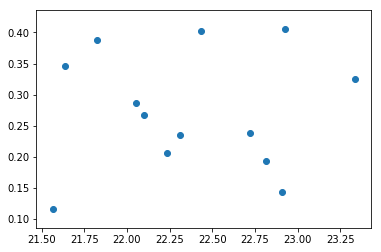

In [17]:
print ("acceptancerate-mu value in true skill ranking")
plt.scatter(x, y)
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(np.asarray(x).reshape(len(x), 1), np.asarray(y).reshape(len(x), 1))
print (lm.score(np.asarray(x).reshape(len(x), 1), np.asarray(y).reshape(len(x), 1)))

0.0029344921760687814


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [19]:
with open('data/effectiveness.json') as file:
    domain_effectiveness = json.load(file)

print (domain_effectiveness)

[{'domain': 'twitter.com', 'intervention_info_list': [['twitter/remove_twitter_feed', 331.5359263712885, 334.8082784113948, 328.2635743311822], ['twitter/show_timer_banner', 1122.15417663727, 1139.3949015624082, 1104.9134517121317], ['twitter/toast_notifications', 455.2862514716836, 460.2518143882367, 450.3206885551305], ['twitter/make_user_wait', 261.07414526180906, 267.06519477584624, 255.0830957477719], ['twitter/show_user_info_interstitial', 436.8413848096219, 452.90095206365845, 420.78181755558535], ['twitter/close_tab_timer', 188.6531268264173, 193.8745992000762, 183.43165445275838], ['twitter/scroll_blocker', 299.5506314839874, 309.90235208412406, 289.1989108838507], ['twitter/block_after_interval_per_visit', 626.1415315491307, 642.8309856008765, 609.452077497385], ['ted/suggest_positive_site_interstitial', 7272.638659623638, 7666.14155207316, 6879.135767174116], ['nytimes/suggest_positive_site_interstitial', 395.2099609375, 413.6764515378098, 376.7434703371902], ['my_custom_int

In [20]:
effectiveness = {}
for i in domain_effectiveness:
    info_list = i['intervention_info_list']
    for j in info_list:
        s = j[0]
        if s.find('/') < 0 or s.find('/') > len(s) - 1:
            continue
        s = s[s.find('/') + 1:]
        if s not in effectiveness.keys():
            effectiveness[s] = []
        for k in range(1, len(j)):
            effectiveness[s].append(float(j[k]))

            
print (effectiveness)
        
    

{'remove_twitter_feed': [331.5359263712885, 334.8082784113948, 328.2635743311822, 1.0, 1.0, 1.0, 269.6984536082474, 290.5296836105909, 248.86722360590394, 707.6848847139197, 776.352396476185, 639.0173729516544], 'show_timer_banner': [1122.15417663727, 1139.3949015624082, 1104.9134517121317, 67.66666666666667, 82.2671678947448, 53.06616543858854, 537.3278979767347, 540.6907825308028, 533.9650134226665, 423.2680608365019, 459.9108199058877, 386.62530176711607, 701.802645861601, 710.8037006043911, 692.801591118811, 619.6965294592413, 652.5330763607253, 586.8599825577573, 949.9278195488722, 1035.9318513575024, 863.9237877402421, 618.1877192982456, 661.1024294514552, 575.273009145036, 243.3087658592849, 245.7210083524434, 240.89652336612642, 38.3, 51.81826783078131, 24.78173216921869, 75.24074074074075, 83.84255468650917, 66.63892679497232, 68.7, 99.0865082056858, 38.3134917943142, 66.2, 110.99537675363385, 21.40462324636615, 177.85714285714286, 264.05698798461395, 91.65729772967177, 250.0,

In [21]:
import numpy as np

In [22]:
for i in effectiveness.keys():
    effectiveness[i] = np.average(effectiveness[i])

In [23]:
print (effectiveness)

{'remove_twitter_feed': 327.479816173364, 'show_timer_banner': 216.9149806532676, 'toast_notifications': 249.75339370875668, 'make_user_wait': 159.93149146639468, 'show_user_info_interstitial': 194.5993689502124, 'close_tab_timer': 77.85297675255572, 'scroll_blocker': 151.8921975157927, 'block_after_interval_per_visit': 166.0317833009829, 'suggest_positive_site_interstitial': 322.82667873404586, 'prompt_reason': 97.3752547217652, 'remove_news_feed': 281.54607733995573, 'remove_comments': 382.63733321659953, 'feed_injection_timer': 136.1740258925783, 'rich_notifications': 271.6233332614136, 'remove_clickbait': 446.1567646584402, 'feed_injection_positive_goal_widget': 275.09517535144346, 'block_after_interval_no_prompt': 274.7708333333333, 'notification_hijacker': 513.8809897879024, 'pause_videos': 430.05056553559547, 'facebook_replace_ads_with_lesson': 835.6973849491836, 'facebook_feed_lesson_injection': 192.46886466652276, 'show_user_info_banner': 36.78510695016719, 'remove_comment_sec

In [24]:
x = []
y = []
finalResults = acceptance_rate.keys()
finalResults = sorted(finalResults, key= lambda x: acceptance_rate[x])
for i in finalResults:
    if i not in effectiveness.keys():
        print ("what the fuck?")
    x.append(acceptance_rate[i])
    y.append(effectiveness[i])

In [25]:
print (x)
print (y)
x = np.asarray(x).reshape(len(x), 1)
y = np.asarray(y).reshape(len(x), 1)

[0, 0, 0.11538461538461539, 0.14285714285714285, 0.16666666666666666, 0.1935483870967742, 0.2054794520547945, 0.2347417840375587, 0.23809523809523808, 0.26666666666666666, 0.2777777777777778, 0.2857142857142857, 0.31906614785992216, 0.32558139534883723, 0.3333333333333333, 0.34657039711191334, 0.35135135135135137, 0.3598130841121495, 0.36666666666666664, 0.3877551020408163, 0.4, 0.4025974025974026, 0.4057971014492754, 0.42857142857142855, 0.46153846153846156]
[835.6973849491836, 103.71358576982477, 382.63733321659953, 136.1740258925783, 178.25042438151115, 151.8921975157927, 77.85297675255572, 159.93149146639468, 281.54607733995573, 36.78510695016719, 209.39437684755427, 249.75339370875668, 348.02764227642274, 166.0317833009829, 1366.7113743064447, 97.3752547217652, 165.26269833825148, 194.5993689502124, 322.82667873404586, 216.9149806532676, 327.479816173364, 446.1567646584402, 271.6233332614136, 1078.6864997948296, 592.593924427455]


effectiveness - acceptance rate


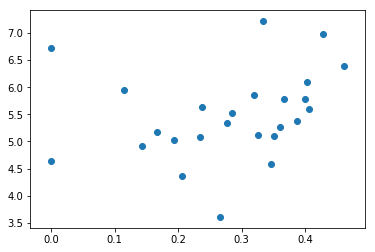

In [26]:
y = (np.log(y))
print ("effectiveness - acceptance rate")
plt.scatter(x, y)
plt.show()

In [27]:
lm = LinearRegression()
lm.fit(x, y)
print (lm.score(np.asarray(x).reshape(len(x), 1), np.asarray(y).reshape(len(x), 1)))

0.05967784858411185


In [28]:
finalResults = ratings.keys()
finalResults = sorted(finalResults, key = lambda x: ratings[x].mu)
x = []
y = []
for i in finalResults:
    s = i[i.find('/') + 1:]
    x.append(ratings[i].mu)
    y.append(effectiveness[s])
    
    
print (x)
print (y)

[21.567703257791308, 21.63568965953408, 21.8241531331257, 22.053618294934083, 22.10010282881869, 22.234995997731893, 22.309184462269496, 22.43289771621459, 22.72184776110902, 22.8119456595043, 22.9089973065589, 22.9255752645202, 23.332860594751136]
[382.63733321659953, 97.3752547217652, 216.9149806532676, 249.75339370875668, 36.78510695016719, 77.85297675255572, 159.93149146639468, 446.1567646584402, 281.54607733995573, 151.8921975157927, 136.1740258925783, 271.6233332614136, 166.0317833009829]


In [29]:
x = np.asarray(x).reshape(len(x), 1)
y = np.asarray(y).reshape(len(x), 1)

effectiveness - mu


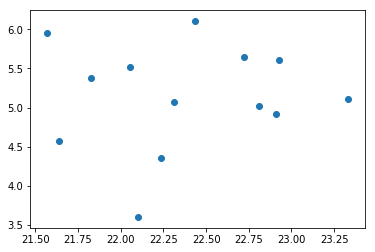

In [32]:
y = (np.log(y))
print ("effectiveness - mu")
plt.scatter(x, y)
plt.show()

In [33]:
lm = LinearRegression()
lm.fit(x, y)
print (lm.score(np.asarray(x).reshape(len(x), 1), np.asarray(y).reshape(len(x), 1)))

0.0055821270507745435
